<a href="https://colab.research.google.com/github/hongqin/python-covid19-analysis-sandbox/blob/master/PD_demo_jhu_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Python to analyze the Covid19 data
Hong Qin

Code at https://github.com/hongqin/python-covid19-analysis-sandbox/blob/master/PD_demo_jhu_covid19.ipynb

Video at https://youtu.be/1JDP4o92tss 

These materials are for education only.


In [1]:
### Import libraries
import pandas as pd # primary data structure library

# Part1. Downloading GitHub Data set 

In [2]:
! git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 53913, done.
remote: Total 53913 (delta 0), reused 0 (delta 0), pack-reused 53913
Receiving objects: 100% (53913/53913), 441.53 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (33910/33910), done.
Checking out files: 100% (642/642), done.


This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [3]:
### Select data path
fullpath1= '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df1 = pd.read_csv(fullpath1, error_bad_lines=False)

fullpath2 = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df2 = pd.read_csv(fullpath2, error_bad_lines=False)

# Part 2. Explore USA time series by counties

In [4]:
df1.shape

(3340, 258)

view the dataframe

In [5]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398,1413,1420,1432,1442,1447,1463,1619,1624,1664,1673,1690,1691,1714,1715,1738
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639,4678,4722,4752,4781,4800,4812,5003,5021,5033,5047,5061,5087,5124,5141,5165
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,604,605,606,613,619,622,626,629,633,628,616,614,620,624,628,628,629,617,614,616,616,616,617,617,618,618,618,620,622,626,629,809,809,824,830,835,838,848,851,857
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,469,474,476,490,494,501,503,510,510,511,513,515,517,523,533,535,538,541,542,545,550,555,557,562,564,566,574,576,578,581,580,612,617,619,628,632,636,635,638,642
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,860,863,887,901,912,930,931,934,946,967,968,979,983,1004,1025,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082,1099,1109,1114,1121,1128,1139,1487,1504,1527,1542,1551,1560,1573,1580,1594


How to find out the columns?

In [6]:
df1.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '9/15/20', '9/16/20', '9/17/20', '9/18/20', '9/19/20', '9/20/20',
       '9/21/20', '9/22/20', '9/23/20', '9/24/20'],
      dtype='object', length=258)

In [7]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,389,390,393,394,398,399,401,409,409,412,417,417,424,425,429,430,430,433,435,440,440,447,447,450,451,453,462,465,470,476,478,481,487,490,493,498,504,506,517,529
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,276,277,278,283,283,283,283,283,283,283,289,289,292,292,295,298,301,303,305,308,308,308,308,309,308,310,310,310,311,312,312,323,327,327,330,334,335,339,342,347
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,53,53,73,73,73,73,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,1,1,1,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,97,100,102,104,106,106,107,108,108,108,108,108,108,108,108,108,108,109,109,110,110,111,111,111,111,111,111,111,111,111,111,111,112,113,113,113,113,113,113,113
3339,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,8,8,12,0,11,11,11,11,11,11,11,11,11,11,11,11,19,20,20,20,20,20,20,21,21,21,23,23,23,23,23,23,23,23,23,23,26,25,27


In [8]:
df1['Admin2'][3335:3340]

3335         Teton
3336         Uinta
3337    Unassigned
3338      Washakie
3339        Weston
Name: Admin2, dtype: object

In [9]:
df1.iloc[3335:3340, 4:7]

,FIPS,Admin2,Province_State
3335,56039.0,Teton,Wyoming
3336,56041.0,Uinta,Wyoming
3337,90056.0,Unassigned,Wyoming
3338,56043.0,Washakie,Wyoming
3339,56045.0,Weston,Wyoming


How to find out dataframe dimensions

In [10]:
print ('dataframe dimensions:', df1.shape)

dataframe dimensions: (3340, 258)


How many "province states" are there in this data set?

In [11]:
df1.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [12]:
len(df1.Province_State.unique())

58

### Q, what is the larged case value in this data set? 

In [13]:
df1.iloc[:, 11:].max().max()

264414

Find out the largest value for column '9/8/20'

In [14]:
df1["9/13/20"].max()

253985

## Find out which row has the largest value on '9/14/20'

In [15]:
df1.loc[df1['9/14/20']==254656]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
213,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,"Los Angeles, California, US",0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,221971,223230,224105,225827,227346,229054,230662,231695,232893,233777,235386,236986,238458,239756,240749,241768,242521,243935,244999,246407,247542,248334,248821,249241,249859,251024,252066,253176,253985,254656,255049,256148,257271,258516,259817,260797,261446,262133,263333,264414


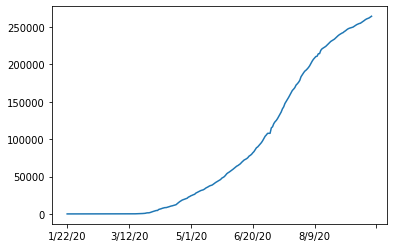

In [16]:
LA = df1.iloc[213, 11:]
type(LA)
#print(LA)
LA.plot()

## plot
Because pandas do plot by columns, JHU data set put time series by row. So, we have to transpose the JHU dataframe. 

In [17]:
UScases = df1.iloc[0:3, 11:].transpose() 
UScases.shape
UScases

,0,1,2
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
9/20/20,1690,5061,835
9/21/20,1691,5087,838
9/22/20,1714,5124,848
9/23/20,1715,5141,851


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fc81d49e8>,
      dtype=object)

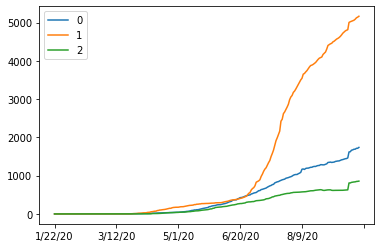

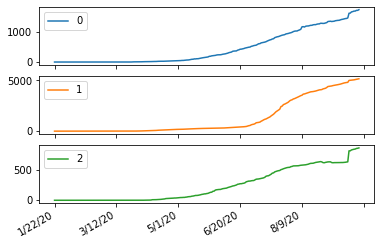

In [18]:

UScases.plot()
UScases.plot(subplots=True)

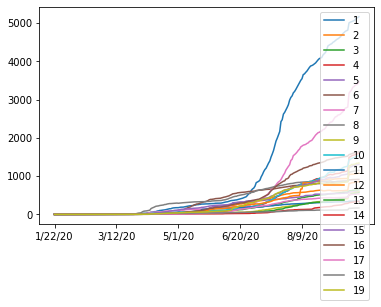

In [19]:
df1.iloc[1:20, 11:].transpose().plot()


## Add meaningful index to the dataframe

In [20]:
# one way is to load csv with index 
df1 = pd.read_csv(fullpath1, error_bad_lines=False, index_col=10) #10th index picks 11th column of "Combined_Key"
df1.reset_index(drop=True)
df1.index

Index(['Autauga, Alabama, US', 'Baldwin, Alabama, US', 'Barbour, Alabama, US',
       'Bibb, Alabama, US', 'Blount, Alabama, US', 'Bullock, Alabama, US',
       'Butler, Alabama, US', 'Calhoun, Alabama, US', 'Chambers, Alabama, US',
       'Cherokee, Alabama, US',
       ...
       'Park, Wyoming, US', 'Platte, Wyoming, US', 'Sheridan, Wyoming, US',
       'Sublette, Wyoming, US', 'Sweetwater, Wyoming, US',
       'Teton, Wyoming, US', 'Uinta, Wyoming, US', 'Unassigned, Wyoming, US',
       'Washakie, Wyoming, US', 'Weston, Wyoming, US'],
      dtype='object', name='Combined_Key', length=3340)

In [21]:
df1.shape

(3340, 257)

In [22]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398,1413,1420,1432,1442,1447,1463,1619,1624,1664,1673,1690,1691,1714,1715,1738
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639,4678,4722,4752,4781,4800,4812,5003,5021,5033,5047,5061,5087,5124,5141,5165
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,604,605,606,613,619,622,626,629,633,628,616,614,620,624,628,628,629,617,614,616,616,616,617,617,618,618,618,620,622,626,629,809,809,824,830,835,838,848,851,857
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,469,474,476,490,494,501,503,510,510,511,513,515,517,523,533,535,538,541,542,545,550,555,557,562,564,566,574,576,578,581,580,612,617,619,628,632,636,635,638,642
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,860,863,887,901,912,930,931,934,946,967,968,979,983,1004,1025,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082,1099,1109,1114,1121,1128,1139,1487,1504,1527,1542,1551,1560,1573,1580,1594


In [23]:
# another way is to re-assign index
df1 = pd.read_csv(fullpath1, error_bad_lines=False)
newrows = list( df1['Combined_Key'])
df1.index =  newrows
df1.shape

(3340, 258)

In [24]:
df1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
"Autauga, Alabama, US",84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1218,1219,1235,1241,1240,1255,1264,1266,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398,1413,1420,1432,1442,1447,1463,1619,1624,1664,1673,1690,1691,1714,1715,1738
"Baldwin, Alabama, US",84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3877,3888,3906,3931,3957,3997,4037,4069,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639,4678,4722,4752,4781,4800,4812,5003,5021,5033,5047,5061,5087,5124,5141,5165
"Barbour, Alabama, US",84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,604,605,606,613,619,622,626,629,633,628,616,614,620,624,628,628,629,617,614,616,616,616,617,617,618,618,618,620,622,626,629,809,809,824,830,835,838,848,851,857
"Bibb, Alabama, US",84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,469,474,476,490,494,501,503,510,510,511,513,515,517,523,533,535,538,541,542,545,550,555,557,562,564,566,574,576,578,581,580,612,617,619,628,632,636,635,638,642
"Blount, Alabama, US",84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,860,863,887,901,912,930,931,934,946,967,968,979,983,1004,1025,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082,1099,1109,1114,1121,1128,1139,1487,1504,1527,1542,1551,1560,1573,1580,1594


In [25]:
list(df1['Combined_Key'] )[1:10]

['Baldwin, Alabama, US',
 'Barbour, Alabama, US',
 'Bibb, Alabama, US',
 'Blount, Alabama, US',
 'Bullock, Alabama, US',
 'Butler, Alabama, US',
 'Calhoun, Alabama, US',
 'Chambers, Alabama, US',
 'Cherokee, Alabama, US']

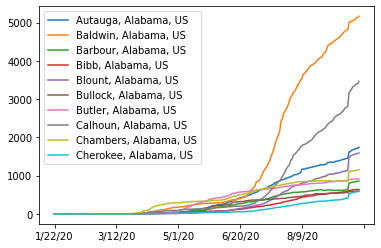

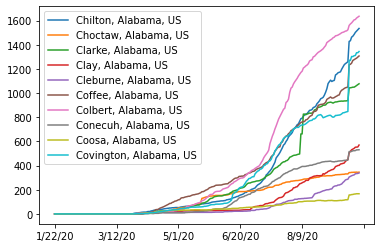

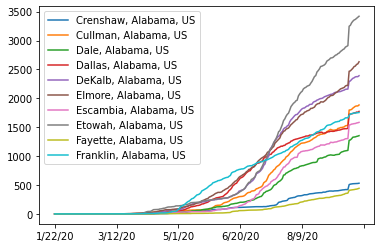

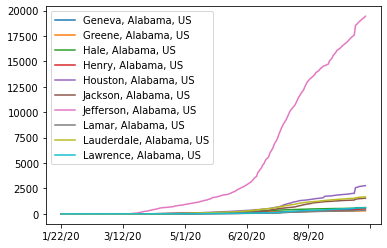

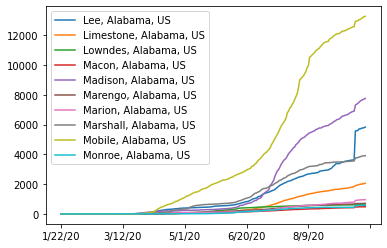

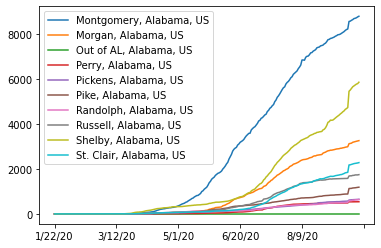

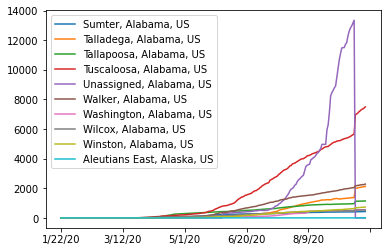

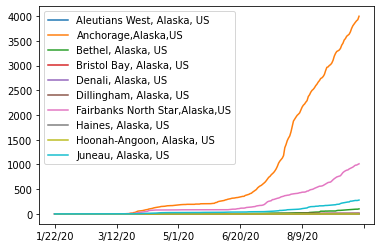

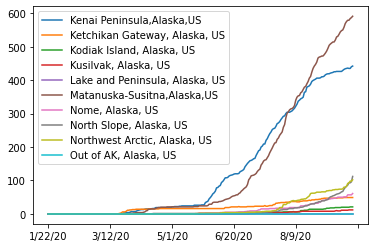

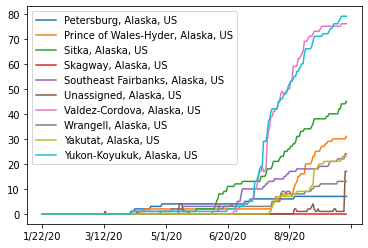

In [26]:
step = 10
for i in range(0, 100, step):
#for i in range(0, 3340, step):
  UScases = df1.iloc[ i : (i+step), 11:].transpose()
  UScases.plot()

In [27]:
df1.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
"Teton, Wyoming, US",84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,389,390,393,394,398,399,401,409,409,412,417,417,424,425,429,430,430,433,435,440,440,447,447,450,451,453,462,465,470,476,478,481,487,490,493,498,504,506,517,529
"Uinta, Wyoming, US",84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,276,277,278,283,283,283,283,283,283,283,289,289,292,292,295,298,301,303,305,308,308,308,308,309,308,310,310,310,311,312,312,323,327,327,330,334,335,339,342,347
"Unassigned, Wyoming, US",84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,53,53,73,73,73,73,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,1,1,1,0,0,0,0
"Washakie, Wyoming, US",84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,97,100,102,104,106,106,107,108,108,108,108,108,108,108,108,108,108,109,109,110,110,111,111,111,111,111,111,111,111,111,111,111,112,113,113,113,113,113,113,113
"Weston, Wyoming, US",84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,"Weston, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,8,8,12,0,11,11,11,11,11,11,11,11,11,11,11,11,19,20,20,20,20,20,20,21,21,21,23,23,23,23,23,23,23,23,23,23,26,25,27


## Note. It turns out that there are unassigned cases in some states, such as Wyoming. Thse unassigned cases become zero when they are settled. 

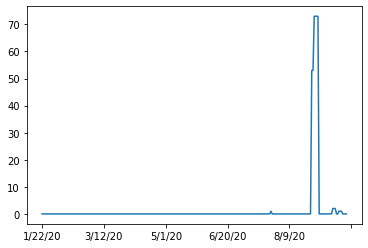

In [28]:
df1.loc['Unassigned, Wyoming, US', ][11:].plot()

In [29]:
df1.loc[ df1.index.str.contains('Unassigned'), ].shape
df1.loc[ df1.index.str.contains('Unassigned'), ].head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
"Unassigned, Alabama, US",84090001,US,USA,840,90001.0,Unassigned,Alabama,US,0.0,0.0,"Unassigned, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4354,4409,4546,4694,4966,4966,4966,4966,5941,6288,7128,8229,8462,8605,8779,8906,9482,10019,10684,11104,11476,11499,11499,11727,11837,12298,12606,12823,12960,13160,13347,0,0,0,0,0,0,0,0,0
"Unassigned, Alaska, US",84090002,US,USA,840,90002.0,Unassigned,Alaska,US,0.0,0.0,"Unassigned, Alaska, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,2,2,3,4,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,17,17
"Unassigned, Arizona, US",84090004,US,USA,840,90004.0,Unassigned,Arizona,US,0.0,0.0,"Unassigned, Arizona, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,3,3,4,3,4,1,1,0,3
"Unassigned, Arkansas, US",84090005,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,"Unassigned, Arkansas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,755,774,785,786,774,805,813,810,826,820,794,806,815,901,904,904,897,956,1029,1230,1214,1227,1227,1209,1157,1117,1287,1544,1641,1628,1595,1458,1535,1621,1649,1691,1686,1592,1624,1778
"Unassigned, California, US",84090006,US,USA,840,90006.0,Unassigned,California,US,0.0,0.0,"Unassigned, California, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# df1.loc[df1.index.str.contains('Unassigned'), ].plot() #No, this is not working properly

In [31]:
# df1.loc[df1.index.str.contains("Unsassigned"),11:].plot() #error 

In [32]:
# df1.loc[df1.index.str.contains("Unassigned")][11:].plot() #wrong plot

In [35]:
#df1.loc[df1.index.str.contains('Unassigned'), :][:,11:]

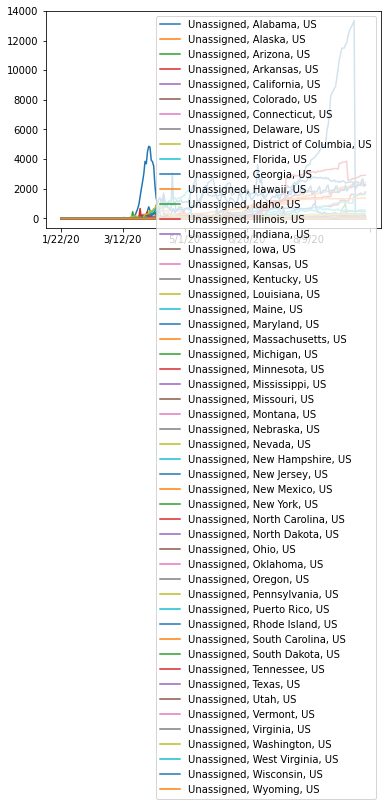

In [36]:
unassigned_df = df1.loc[df1.index.str.contains('Unassigned')]
unassigned_df.iloc[ :, 11:].shape
unassigned_df.iloc[ :, 11:].transpose().plot()

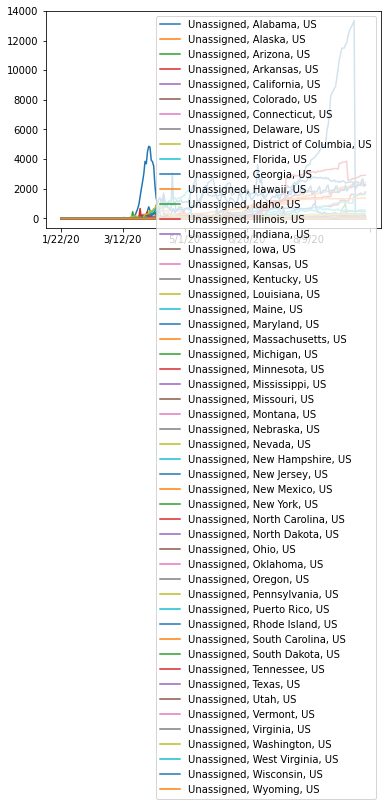

In [37]:
df1.loc[df1.index.str.contains('Unassigned')].iloc[:, 11:].transpose().plot() # Well done, a single line solution! 

## How about the cases at the Hamilton county, TN? 

In [38]:
# Can we examine cumualted cases at the Hamilton County, TN? 


df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6801,6862,6995,7145,7223,7312,7373,7463,7496,7586,7689,7763,7863,7939,7965,7998,8136,8217,8294,8326,8427,8505,8563,8594,8640,8672,8718,8722,8765,8860,8924,8859,8899,8985,9033,9106,9144,9211,9263,9287


In [39]:
dfHamilton = df1[df1.Combined_Key == "Hamilton, Tennessee, US"]
dfHamilton

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
"Hamilton, Tennessee, US",84047065,US,USA,840,47065.0,Hamilton,Tennessee,US,35.176702,-85.166522,"Hamilton, Tennessee, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6801,6862,6995,7145,7223,7312,7373,7463,7496,7586,7689,7763,7863,7939,7965,7998,8136,8217,8294,8326,8427,8505,8563,8594,8640,8672,8718,8722,8765,8860,8924,8859,8899,8985,9033,9106,9144,9211,9263,9287


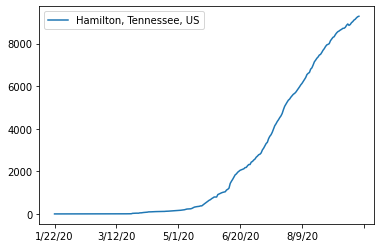

In [40]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

#Part 3. Examine the cases in each state.

In [41]:

df1.loc[ :, 'Province_State']

Autauga, Alabama, US       Alabama
Baldwin, Alabama, US       Alabama
Barbour, Alabama, US       Alabama
Bibb, Alabama, US          Alabama
Blount, Alabama, US        Alabama
                            ...   
Teton, Wyoming, US         Wyoming
Uinta, Wyoming, US         Wyoming
Unassigned, Wyoming, US    Wyoming
Washakie, Wyoming, US      Wyoming
Weston, Wyoming, US        Wyoming
Name: Province_State, Length: 3340, dtype: object

In [42]:
groupby_state = df1.iloc[:,11:].groupby(df1['Province_State'])
type( groupby_state )

pandas.core.groupby.generic.DataFrameGroupBy

In [43]:
df_by_state = groupby_state.sum()
type( df_by_state )

pandas.core.frame.DataFrame

In [44]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,108433,109004,110361,111478,112449,113632,114532,115060,116710,117242,119254,121023,122185,123889,125235,126058,127616,128239,129285,130393,131803,132314,132973,133606,134417,135565,136703,137646,138755,139459,140160,141087,141757,142863,144164,144962,145780,146584,147153,148206
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4259,4309,4371,4438,4520,4588,4677,4741,4810,4843,4895,4974,5092,5182,5226,5263,5297,5362,5464,5584,5677,5760,5793,5828,5891,6012,6104,6207,6268,6343,6384,6432,6537,6644,6729,6822,6892,6936,7004,7132
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,193537,194005,194920,195557,196280,196899,197895,198103,198414,199273,199459,200139,200658,201287,201661,201835,202342,202861,203953,204681,205517,205767,205964,206045,206541,207002,207523,208128,208512,208725,209209,209907,211660,212942,213551,214021,214251,214846,215284,215852
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52665,53077,53487,54216,54765,55652,56199,56574,56894,57374,58023,58745,59583,60378,60856,61224,61497,62112,63081,64175,64690,65377,65727,66021,66406,66804,67911,69710,70219,70627,71497,72219,73211,74082,75160,75723,76364,76981,77963,79049


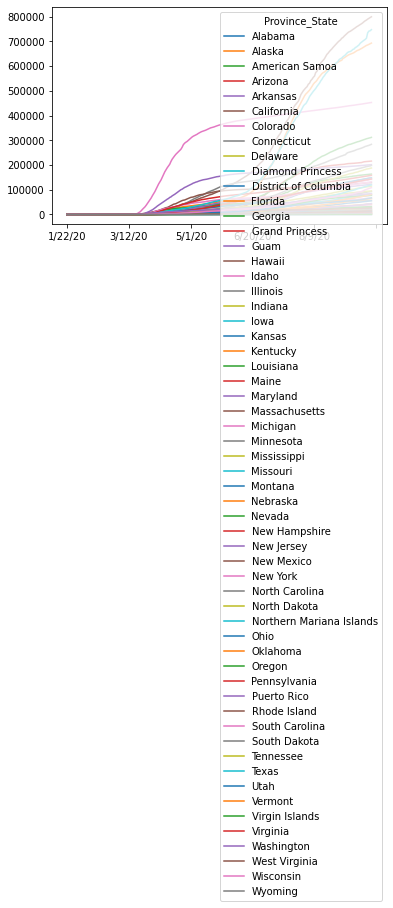

In [45]:
df_by_state.transpose().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fc5a44240>,
      dtype=object)

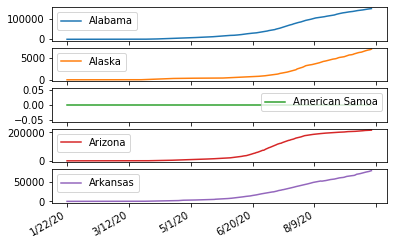

In [46]:
df_by_state.transpose().iloc[:,0:5].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fc7c4dd30>],
      dtype=object)

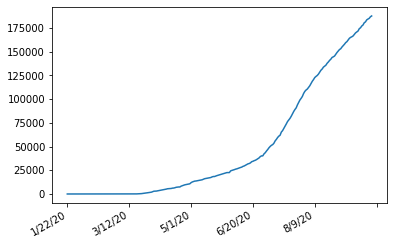

In [47]:
df_by_state.transpose().loc[:,"Tennessee"].plot(subplots=True)

In [48]:
df_by_state.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20
Province_State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,108433,109004,110361,111478,112449,113632,114532,115060,116710,117242,119254,121023,122185,123889,125235,126058,127616,128239,129285,130393,131803,132314,132973,133606,134417,135565,136703,137646,138755,139459,140160,141087,141757,142863,144164,144962,145780,146584,147153,148206
Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4259,4309,4371,4438,4520,4588,4677,4741,4810,4843,4895,4974,5092,5182,5226,5263,5297,5362,5464,5584,5677,5760,5793,5828,5891,6012,6104,6207,6268,6343,6384,6432,6537,6644,6729,6822,6892,6936,7004,7132
American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,193537,194005,194920,195557,196280,196899,197895,198103,198414,199273,199459,200139,200658,201287,201661,201835,202342,202861,203953,204681,205517,205767,205964,206045,206541,207002,207523,208128,208512,208725,209209,209907,211660,212942,213551,214021,214251,214846,215284,215852
Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52665,53077,53487,54216,54765,55652,56199,56574,56894,57374,58023,58745,59583,60378,60856,61224,61497,62112,63081,64175,64690,65377,65727,66021,66406,66804,67911,69710,70219,70627,71497,72219,73211,74082,75160,75723,76364,76981,77963,79049


In [49]:
# df_by_state.loc['Tennessee'][11:].transpose().plot() #This is bit problematic on the columns

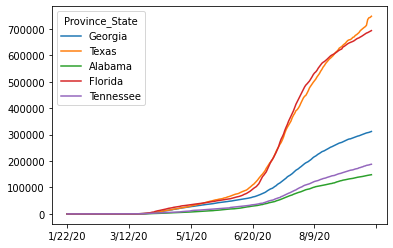

In [50]:
df_by_state.loc[['Georgia', 'Texas', 'Alabama', 'Florida', 'Tennessee']].transpose().plot() #Here, Texas and Tennessee are row-index

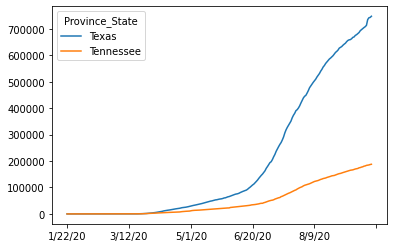

In [51]:
df_by_state.transpose()[['Texas', 'Tennessee']].plot() #Here, Texas ans Tennessee are columns

# How to examine the new cases daily? 

## diff() on a test dataframe

In [52]:
dataset = [(2, 4, 6, 8),
           (10, 12, 14, 18),
           (20, 22, 24, 26),
           (28, 30, 32, 34)];

df_test = pd.DataFrame(dataset, columns = ("A", "B", "C", "D" ));


In [ ]:
df_test.diff(axis=0) #by row

In [ ]:
df_test.diff(axis=1) #by column

## diff() on US covid19 data set
 JHU cases are by row, and we need to calculate difference between columns

In [ ]:
df_by_state.head()

In [ ]:
df_dailycases_by_state =  df_by_state.diff(axis=1) #1 by columns
df_dailycases_by_state.head()

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Wisconsin']].plot()

In [ ]:
df_dailycases_by_state.loc[['Tennessee', 'Texas']].iloc[:, 2:].rolling(window=3).mean()

#.rolling(window=3).mean()

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3, center=False).mean()

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].head()

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska', 'Florida']].rolling(window=14).mean().plot(logy=True)

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Alaska']].rolling(window=3).mean().plot(subplots=True)

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].rolling(window=7).mean().plot()

In [ ]:
df_dailycases_by_state.transpose()[['Tennessee', 'Texas']].head()

## Examine the daily confirmed cases in Hamilton County, TN

In [ ]:
df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:].transpose().plot()

In [ ]:
df_Hamilton = df1.loc[df1['Combined_Key'] == 'Hamilton, Tennessee, US'].iloc[:, 11:]

type(df_Hamilton)
df_Hamilton.head()

In [ ]:
df_Hamilton.transpose().diff(axis=0).plot()

In [ ]:
df_Hamilton.transpose().diff(axis=0).rolling(window=3).median().plot()

In [ ]:
df_Hamilton.transpose().diff(axis=0).rolling(window=7).mean().plot()

# Pick a time window using datetime

In [ ]:
#from datetime import datetime 

df_dailycases_by_state2 = df_dailycases_by_state.transpose()

df_dailycases_by_state2.head()

In [ ]:
df_dailycases_by_state2.index = pd.to_datetime(df_dailycases_by_state2.index)
df_dailycases_by_state2.index

In [ ]:
df_dailycases_by_state2.loc['2020-08-01':, ['Alabama', 'Tennessee', 'Georgia', 'Virginia', 'Florida']].plot()

## Examine the row with the largest value on 9/8/2020

In [ ]:
subset = df1.loc[df1['9/8/20']==249241]

In [ ]:
subset = subset.transpose()
subset = subset.iloc[:][11:]
type(subset)

In [ ]:
type(subset)

In [ ]:
from datetime import datetime

#datetime.strptime( '9/8/20', '%m/%d/%y') 

dates = [datetime.strptime( x, '%m/%d/%y') for x in subset.columns[11:]]
print(dates)

In [ ]:
df1.iloc[5:10, -20:-1 ]

#Part 4 Explore Global Data set

In [ ]:

df2 = pd.read_csv(fullpath2, error_bad_lines=False)
df2.columns

In [ ]:
df2['Country/Region']
list(df2['Country/Region'].unique())

In [ ]:
# Countries affected
countries = df2['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)

In [ ]:
df2by_country = df2.iloc[:, 5:].groupby(df2['Country/Region']).sum().transpose()

In [ ]:
df2by_country.head()

In [ ]:
df2by_country.index = pd.to_datetime(df2by_country.index)

In [ ]:
### Check if the dataframe contains NaN values
df2by_country.head()

In [ ]:
  df2by_country.columns[ df2by_country.columns.str.contains('US') ]

In [ ]:
  df2by_country[['US', 'France', 'India', 'Sweden']].plot(logy=True)


In [ ]:
  df2by_country[['US', 'France', 'India', 'Sweden']]['2020-05-01':].plot(logy=False)

# Alternative approach to load data from GitHub

Go to GitHub, select the csv file,  select "view as raw",  and copy the URL. 

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

df = pd.read_csv(url)

In [ ]:
df.head

In [ ]:
? pd.read_csv()

In [ ]:
df2 = pd.read_csv(url, skiprows=5)
df2.head

#Part 5. In progress Load Google Mobility data set

In [ ]:

urlGoogleMobility = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
df.GM = pd.read_csv(urlGoogleMobility )

In [ ]:
df.GM.head